In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.drop("Name",axis=1,inplace=True)
data.drop("PassengerId",axis=1,inplace=True)
data.drop("Ticket",axis=1,inplace=True)
data.drop("Parch",axis=1,inplace=True)
data.drop("Fare",axis=1,inplace=True)
data.drop("Cabin",axis=1,inplace=True)


In [6]:
data

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S
...,...,...,...,...,...,...
886,0,2,male,27.0,0,S
887,1,1,female,19.0,0,S
888,0,3,female,NaN,1,S
889,1,1,male,26.0,0,C


In [7]:
data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

#### we will do data imputation to get the value of age whoever not filled the age

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
#data["Pclass"] == 1
#Age1 = int(data[ data["Pclass"] == 1    ]['Age'].dropna().mean())
#Age1

#Age2 = int(data[ data["Pclass"] == 2    ]['Age'].dropna().mean())
#Age2

#Age3 = int(data[ data["Pclass"] == 3    ]['Age'].dropna().mean())
#Age3

In [10]:
for i in range(1,4):
    age = int(data[data["Pclass"] == i]["Age"].dropna().mean())
    print(age)

38
29
25


In [11]:

#data[ data["Pclass"] == 1    ]['Age'].fillna(38)
#data[ data["Pclass"] == 2    ]['Age'].fillna(29)
#data[ data["Pclass"] == 3    ]['Age'].fillna(25)

In [12]:
import numpy
def set_age(row ):
    
    Pclass=row[0]
    age=row[1]
    
    if numpy.isnan(age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return age
    

In [13]:
data["Age"]=data[ ["Pclass","Age"] ].apply(set_age,axis=1)

<Axes: >

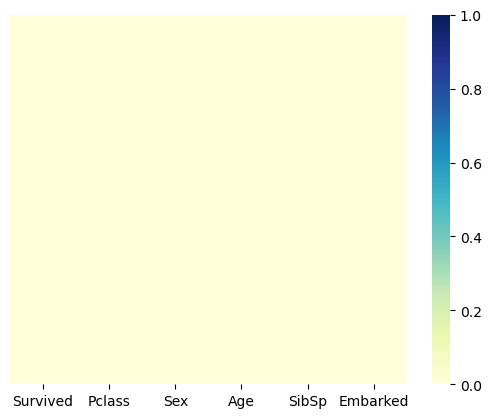

In [14]:
sns.heatmap( data.isnull(),yticklabels = False, cmap="YlGnBu" )

In [15]:
data

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S
...,...,...,...,...,...,...
886,0,2,male,27.0,0,S
887,1,1,female,19.0,0,S
888,0,3,female,25.0,1,S
889,1,1,male,26.0,0,C


In [16]:
Pclass = pd.get_dummies(data["Pclass"],drop_first=True)
Sex = pd.get_dummies(data["Sex"],drop_first=True)
SibSp = pd.get_dummies(data["SibSp"],drop_first=True)
Embarked = pd.get_dummies(data["Embarked"],drop_first=True)

In [17]:
Pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [18]:
data.drop( ["Pclass","Sex","SibSp","Embarked"],axis=1,inplace=True)

In [19]:
data

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
886,0,27.0
887,1,19.0
888,0,25.0
889,1,26.0


In [20]:
data = pd.concat( [data,Pclass,Sex,SibSp,Embarked], axis=1 )

In [21]:
data

,Survived,Age,2,3,male,1,2,3,4,5,8,Q,S
0,0,22.0,0,1,1,1,0,0,0,0,0,0,1
1,1,38.0,0,0,0,1,0,0,0,0,0,0,0
2,1,26.0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,0,0,0,1,0,0,0,0,0,0,1
4,0,35.0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,1,0,1,0,0,0,0,0,0,0,1
887,1,19.0,0,0,0,0,0,0,0,0,0,0,1
888,0,25.0,0,1,0,1,0,0,0,0,0,0,1
889,1,26.0,0,0,1,0,0,0,0,0,0,0,0


In [22]:
y=data["Survived"]

In [23]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [24]:
X=data.drop("Survived",axis=1)

In [25]:
X

,Age,2,3,male,1,2,3,4,5,8,Q,S
0,22.0,0,1,1,1,0,0,0,0,0,0,1
1,38.0,0,0,0,1,0,0,0,0,0,0,0
2,26.0,0,1,0,0,0,0,0,0,0,0,1
3,35.0,0,0,0,1,0,0,0,0,0,0,1
4,35.0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,1,0,1,0,0,0,0,0,0,0,1
887,19.0,0,0,0,0,0,0,0,0,0,0,1
888,25.0,0,1,0,1,0,0,0,0,0,0,1
889,26.0,0,0,1,0,0,0,0,0,0,0,0


In [26]:
X.columns=X.columns.astype(str)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X,y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
model.coef_

array([[-0.0379542 , -0.9551251 , -2.18407091, -2.48950965,  0.20336704,
        -0.05380888, -1.25857681, -0.96339681, -0.76638011, -1.06523337,
        -0.06415336, -0.45916146]])

In [31]:
model.intercept_

array([3.82939239])

## now lets test on testing dataset

In [82]:
data_test  = pd.read_csv("test.csv")

In [83]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [84]:
data_test.drop("Name",axis=1,inplace=True)
data_test.drop("PassengerId",axis=1,inplace=True)
data_test.drop("Ticket",axis=1,inplace=True)
data_test.drop("Parch",axis=1,inplace=True)
data_test.drop("Fare",axis=1,inplace=True)
data_test.drop("Cabin",axis=1,inplace=True)

In [85]:
data_test

,Pclass,Sex,Age,SibSp,Embarked
0,3,male,34.5,0,Q
1,3,female,47.0,1,S
2,2,male,62.0,0,Q
3,3,male,27.0,0,S
4,3,female,22.0,1,S
...,...,...,...,...,...
413,3,male,NaN,0,S
414,1,female,39.0,0,C
415,3,male,38.5,0,S
416,3,male,NaN,0,S


In [86]:
for i in range(1,4):
    age = int(data_test[data_test["Pclass"] == i]["Age"].dropna().mean())
    print(age)

40
28
24


In [87]:
import numpy
def set_age(row ):
    
    Pclass=row[0]
    age=row[1]
    
    if numpy.isnan(age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return age

In [90]:
data_test["Age"]=data_test[ ["Pclass","Age"] ].apply(set_age,axis=1)

<Axes: >

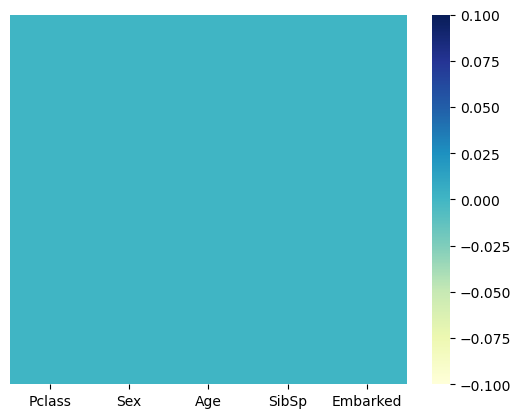

In [91]:
sns.heatmap( data_test.isnull(),yticklabels = False, cmap="YlGnBu" )

In [92]:
Pclass = pd.get_dummies(data_test["Pclass"],drop_first=True)
Sex = pd.get_dummies(data_test["Sex"],drop_first=True)
SibSp = pd.get_dummies(data_test["SibSp"],drop_first=True)
Embarked = pd.get_dummies(data_test["Embarked"],drop_first=True)

In [93]:
data_test.drop( ["Pclass","Sex","SibSp","Embarked"],axis=1,inplace=True)

In [94]:
data_test

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0
...,...
413,25.0
414,39.0
415,38.5
416,25.0


In [95]:
data = pd.concat( [data_test,Pclass,Sex,SibSp,Embarked], axis=1 )

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
model = LogisticRegression()

In [100]:
model.fit(X_test,y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
model.coef_

array([[-0.04087327, -0.65951664, -2.19757078, -1.90936923, -0.07809428,
        -0.00851846, -1.00388518, -0.26373037, -0.54405078, -0.65009508,
         0.17028314, -0.36313975]])

In [102]:
model.intercept_

array([3.38049536])

In [103]:
y_pred=model.predict(X_test)

In [104]:
y_test

659    0
349    0
831    1
787    0
555    0
      ..
854    0
696    0
158    0
811    0
651    1
Name: Survived, Length: 268, dtype: int64

In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
confusion_matrix(y_test,y_pred)

array([[154,  15],
       [ 28,  71]], dtype=int64)

In [108]:
(154+71)/(154+15+28+71)

0.8395522388059702